# Анализ данных о продажах игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года и нам необходимо спрогнозировать продажи на 2017 год.


План работы:

1.[Открытие файла с данными и изучение общей информации](#start)

2.[Подготовка данных](#preprocessing)

*Заменим названия столбцов (приведем к нижнему регистру);

*Преобразуем данные в нужные типы;

*Обработаем пропуски при необходимости;

*Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

3.[Анализ данных](#analysis)

*Посмотрим, сколько игр выпускалось в разные годы;

*Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы;

*Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

*Определим, какие платформы лидируют по продажам, установим, они растут или падают. Выберем несколько потенциально прибыльных платформ;

*Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;

*Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами;

*Соотнесем выводы с продажами игр на других платформах;

*Посмотрим на общее распределение игр по жанрам, опишем результат.

4.[Составление портрета пользователя каждого региона](#user)

Определим для пользователя каждого региона (NA, EU, JP):

*Самые популярные платформы (топ-5). Опишем различия в долях продаж;

*Самые популярные жанры (топ-5). Поясним разницу;

*Установим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

5.[Проверка гипотез](#hypotheses)

Проверим гипотезы:

*средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\

*средние пользовательские рейтинги жанров Action  и Sports разные.

6.[Выводы](#conclusion)


<a id="start"></a>

## Шаг 1. Открытие файла с данными и изучение общей информации

импортируем библиотеки pandas, numpy, а также библиотеки matplotlib, seaborn, plotly для визуализации, прочитаем файл с информацией о продажах игр, сохраним ее в соответствующем датафрейме

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


получим общую инормацию о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


в том числе получим информацию о процентном содержании проущенных значений в столбцах

In [8]:
for col in df.columns:
    missing_df = (df[col].isnull()).mean()
    print ('{} - {:.2f}%'.format(col, missing_df*100))

Name - 0.01%
Platform - 0.00%
Year_of_Release - 1.61%
Genre - 0.01%
NA_sales - 0.00%
EU_sales - 0.00%
JP_sales - 0.00%
Other_sales - 0.00%
Critic_Score - 51.32%
User_Score - 40.09%
Rating - 40.48%


### Выводы

Исходя из полученной информации мы можем отметить следующее.

Мы будем анализировать датафрейм со следующими данными:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет 
рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Каждая строка таблицы содержит информацию об определенных характеристиках игры, а также непосредственно статистические сведения о продажах данной игры и ее рейтинге.

На данном этапе мы видим следующие проблемы, которые небходимо решать:наличие пропусков в столбцах с названием игры, года релиза, названия жанра, а также в столбцах со значениями всех рейтингов, логическое несоответствие типов данных определенных столбцов с той информацией, которая в них содержится, а именно в столбце user_score, year_of_release. Кроме того, названия столбцов отражены с заглавной буквы, поэтому их нужно привести к нижнему регистру.

Что касается причин, по которым могли появиться вышеуказанные пропуски, то в части года релиза и названия игры, а также жанра могла быть техническая ошибка, так как данных пропусков не так много. Вместе с тем, в части наличия пропусков в столбцах с рейтингами можно предположить, что, возможно, на некоторые игры отсутствовала рецензия критиков, а также отзывы пользователей, также возможно это технический сбой. В части наличия пропусков в столбцу rating можно предположить, что эти игры не подверглись оценке со стороны ESRB, возможно технический сбой, а возможно данные игры не представилось возможным определить под какую-либо из имеющихся категорий, например различия в законодателстве стран, где выпускаются и реализуются данные игры, либо в силу культурных особенностей в разных странах,то есть где-то это будет игра "для всех", а, например в Иране, такая игра будет недопустима для пользования всем населением, поэтому в отдельных странах могут быть собственные рейтинговые системы для оценки игр, как, например, в Германии имеется система USK. Также наличие пропусков может быть связано в том числе и с тем, что данные за 2016 год неполные.

<a id="preprocessing"></a>

## Шаг 2.Подготовка данных

приведем названия столбцов к нижнему регистру

In [9]:
df.columns = [x.lower() for x in df.columns]

преобразуем тип данных столбца с указанием года релиза в формат даты, выделив год

In [10]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'],format='%Y').astype('datetime64[Y]').dt.year

In [11]:
df['user_score'].value_counts()


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
1.3       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

преобразуем тип данных столбца user_score в числовой, заменив все нечисловые значения на NaN. Под нечисловыми значениями в данном случае мы имеем ввиду значение "tbd", которое обозначает, что рейтинг еще неизвестен, то есть фактически отсутствует.

In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

пропуски в столбцах name, year_of_release и genre удалим ввиду их малого процентного содержания, то есть их удаление значимо не повлияет на конечный результат

In [13]:
df.dropna(subset = ['genre', 'year_of_release', 'name'], inplace = True)

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<div class="alert alert-info"> <b>Пропуски в столбцах с рейтингом критиков и пользовательским рейтингом оставим без изменения, чтобы не исказить результаты анализа, ввиду их большого количества, а также ввиду того  что в обоих столбцах значения пропущены вероятнее всего неслучайно, так как пропуски в столбцах с рейтинтом находятся, как правило, в одной строке, то есть относятся к одной игре </b> 


In [15]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
df.rating.mode()

0    E
dtype: object

In [17]:
df.rating.value_counts(normalize = True, dropna = False)

NaN     0.405984
E       0.238446
T       0.176660
M       0.093408
E10+    0.084712
EC      0.000486
K-A     0.000182
RP      0.000061
AO      0.000061
Name: rating, dtype: float64

пропуски в столбце с категориальными значениями рейтинга ESRB трогать не будем, так как их очень большое количество, а самих возможных значений весьма мало, к тому же большая часть строк заполнена 4-мя значениями, поэтому заполнение пропусков может привести к статистически неверному результату анализа 

In [18]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

посчитаем суммарные продажи по всем регионам и запишем эти данные в новый столбец global_sales

In [19]:
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


###  Выводы

В ходе выполнения 2 шага мы привели названия столбцов анализируемого датафрейма к нижнему регистру, преобразовали тип данных столбца с указанием года релиза в формат даты, выделив год. Также, мы преобразовали тип данных столбца user_score в числовой, заменив все нечисловые значения, а именно значения "tbd", на пропуски, так как фактически это и есть отсутствующие значения рейтинга.Пропуски в столбцах name, year_of_release и genre мы удалили ввиду их малого процентного содержания, то есть их удаление значимо не повлияет на конечный результат.Пропуски в столбцах с рейтингом критиков и пользовательским рейтингом оставили без изменения, чтобы не исказить результаты анализа, ввиду их большого количества, а также ввиду того,  что в обоих столбах значения возможно пропущены неслучайно .Пропуски в столбце с категориальными значениями рейтинга ESRB мы решили не трогать, так как их очень большое количество, а самих возможных значений весьма мало, к тому же большая часть строк заполнена 4-мя значениями, поэтому заполнение пропусков может привести к статистически неверному результату анализа.Также мы посчитали суммарные продажи по всем регионам и записали эти данные в новый столбец global_sales.

<a id="analysis"></a>

## Шаг 3.Исследовтельский анализ данных

с помощью сводной таблицы посмотрим, сколько игр выпускалось в разные годы

In [21]:
games_count = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
games_count.columns = ['year_of_release', 'games_count']
games_count.sort_values(by = 'games_count',ascending=False)

,year_of_release,games_count
28,2008.0,1427
29,2009.0,1426
30,2010.0,1255
27,2007.0,1197
31,2011.0,1136
26,2006.0,1006
25,2005.0,939
22,2002.0,829
23,2003.0,775
24,2004.0,762


отобразим данную динамику в графическом виде

In [22]:
games_count.sort_index()
trace=go.Scatter(x=games_count.year_of_release,
                y=games_count.games_count,
                mode='markers+lines',
                marker=dict(color='rgba(255,0,0,0.5)'))

layout=go.Layout(title='Count of games released each year',
                xaxis=dict(title='Year'),
                yaxis=dict(title='Count of games'))

fig=go.Figure(data=[trace],layout=layout)

iplot(fig)

мы видим, что наибольшее количество игр выпущено в 2008-2009 гг., после чего количество выпускаемых игр начало резко снижаться, при этом до 1994 года количество выпущенных игр являлось незначительным, если смотреть на общую динамику за рассматриваемый период.

Посмотрим, как менялись продажи по платформам. Выберем  платформы с наибольшими суммарными продажами и построим распределение по годам

In [23]:
df_platform = df.pivot_table(index = 'platform', values = 'global_sales', aggfunc = 'sum').reset_index()
df_platform.columns = ['platform','sum_global_sales']
df_platform = df_platform.sort_values("sum_global_sales",ascending=False)

выделим топ-10 платформ

In [24]:
df_platform = df_platform.head(10).reset_index()
df_platform

,index,platform,sum_global_sales
0,16,PS2,1233.56
1,28,X360,961.24
2,17,PS3,931.34
3,26,Wii,891.18
4,4,DS,802.78
5,15,PS,727.58
6,18,PS4,314.14
7,6,GBA,312.88
8,19,PSP,289.53
9,2,3DS,257.81


отобразим список топ-10 платформ в графическом виде

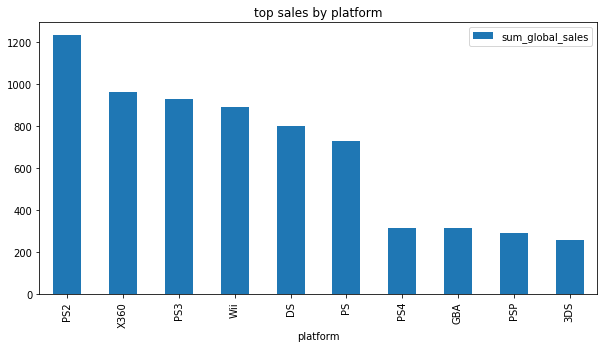

In [25]:
df_platform.plot(kind= 'bar', x='platform', y = 'sum_global_sales', title = 'top sales by platform'
                 ,figsize = (10,5));

мы видим, что по суммарным продажам сильно выделяются первые 6 платформ, а именно PS2, X360, PS3, Wii, DS, PS, после чего значения суммарных продаж заметно ниже

создадим словарь наиболее прибыльных 6 платформ

In [26]:
df_platform = df_platform.head(6).reset_index()

In [27]:
top_platforms_dict = df_platform['platform'].unique() 

<div class="alert alert-info"> <b>с помощью фнукции np.ptp найдем разницу между максимальным и мнимальным значениями года релиза по каждой из 6 платформ, тем самым установив срок "жизни" каждой из этих платформ</b> 

In [28]:
platforms_lifecykle = df[df['platform'].isin(top_platforms_dict)].groupby('platform')['year_of_release'].agg(np.ptp).reset_index()
platforms_lifecykle

,platform,year_of_release
0,DS,28.0
1,PS,9.0
2,PS2,11.0
3,PS3,10.0
4,Wii,10.0
5,X360,11.0


<div class="alert alert-info"> <b>мы видим, что срок "жизни" большнства платформ от 9 до 11 лет, при этом выделяется платформа DS, скорее всего по данной платформе мы обнаружим выбросы, что проверим ниже путем составления графика boxplot</b> 


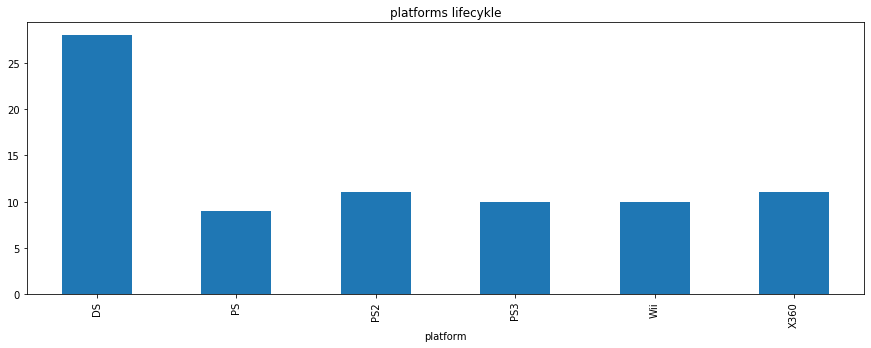

In [29]:
for platform in top_platforms_dict:
    df[df['platform'].isin(top_platforms_dict)].groupby('platform')['year_of_release'].agg(np.ptp).plot(kind='bar', figsize=(15,5))
    plt.title('platforms lifecykle')

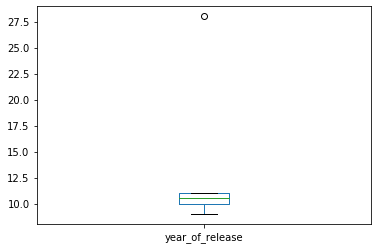

In [30]:
platforms_lifecykle['year_of_release'].plot(kind = 'box');

 <div class="alert alert-info"> <b>как мы видим, значение выше 11 лет действительно является выбросом, возможно это какой-то технический сбой при внесении данных, так как официально эта платформа вышла в свет лишь в 2004 году, а ниже мы сможем увидеть, что продажи начались уже с 1985 года. Учитывая данный выброс, рассчитаем среднюю продолжительность "жизни" платформы без учета данной платформы, а учитывая лишь остальные 5 из топ-6 платформ.</b> 


In [31]:
platforms_lifecykle.query('platform != "DS"')['year_of_release'].mean()

10.2

средний срок "жизни" платформы составил 10.2.

по указанным 6 лидирующим платформам отобразим в графическом виде распределение суммарных продаж по годам

In [32]:
trace_list = []
for column in ['DS', 'PS2', 'PS3', 'X360', 'Wii', 'PS']:
    z=df[df['platform']==column][['global_sales', 'year_of_release']].groupby('year_of_release')['global_sales'].sum().sort_index()
    trace=go.Scatter(x=z.index,y=z.values,mode='lines+markers',name=column)
    trace_list.append(trace)
    layout=go.Layout(title='Global sales of top platforms released each year',xaxis=dict(title='Year'),yaxis=dict(title='Global sales'))
    fig=go.Figure(data= trace_list,layout=layout)
    iplot(fig)


<div class="alert alert-info"> <b>мы видим, что в основном период значительных продаж начианается с 1994 года, в частности с платформы PS, до указанного года мы видим продажи по платформе  DS, однако, как мы определили выше, это выбросы. Как мы видим, в период с 2004 по 2006 гг. появилось 4 новых платформы, а именно DS, XBox 360, PS3, Wii. Характерный срок жизни платформы, как мы определили выше, составляет 10-11 лет, поэтому с учетом того, что мы прогнозируем ситуацию на 2017 год, начало анализируемого периода должно быть не позднее 2007 года, но, чтобы при анализе рассматривать только последние поколения платформ, которые будут актуальными в 2017 году, и в то же время был достаточный по продожительности интервал времени для проведения статистических расчетов, то есть использовать закон больших чисел, начало интервала обозначим как 2010 год, то есть актуальным будет период с 2010 по 2016 гг.</b> 

In [33]:
# Код ревьюера
trace_list = []
for column in ['DS', 'PS2', 'PS3', 'X360', 'Wii', 'PS']:
    z=df[df['platform']==column][['global_sales', 'year_of_release']].groupby('year_of_release')['global_sales'].sum().sort_index()
    trace=go.Scatter(x=z.index,y=z.values,mode='lines+markers',name=column)
    trace_list.append(trace)
    layout=go.Layout(title='Global sales of top platforms released each year',xaxis=dict(title='Year'),yaxis=dict(title='Global sales'))
    fig=go.Figure(data= trace_list,layout=layout)
iplot(fig)

соответственно сделаем срез, где год продаж начинается с 2010

In [34]:
df = df.query('year_of_release > 2010') 

получим сведения о лидерах продаж в разрезе платформ за актуализированный период и отразим полученный результат в графичеком виде.

In [35]:
df_platform = df.pivot_table(index = 'platform', values = 'global_sales', aggfunc = 'sum').reset_index()
df_platform.columns = ['platform','sum_global_sales']
df_platform = df_platform.sort_values("sum_global_sales",ascending=False)
df_platform

,platform,sum_global_sales
4,PS3,445.57
10,X360,380.38
5,PS4,314.14
0,3DS,257.81
11,XOne,159.32
2,PC,97.68
8,Wii,95.02
9,WiiU,82.19
7,PSV,53.81
1,DS,38.73


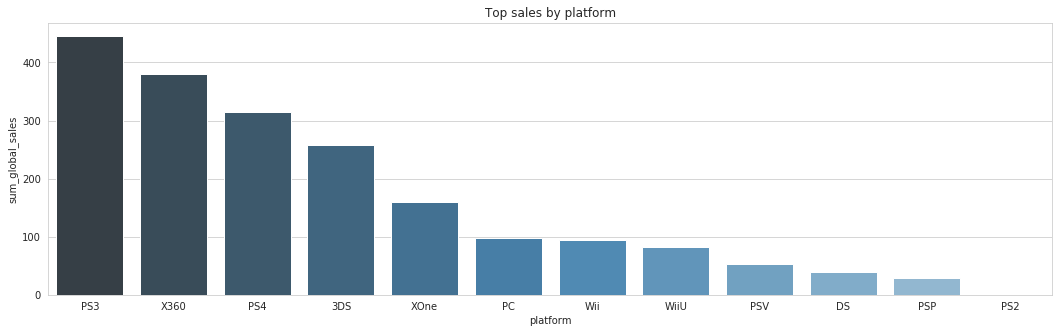

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
plt.title('Top sales by platform')
sns.barplot(data = df_platform, x='platform', y='sum_global_sales', palette = 'Blues_d');

Чтобы лучше видеть, на какой стадии пеериода "жизни" находятся данные платформы, отобразим распределение суммарных продаж по данным платформам по годам

In [37]:
trace_list = []
for column in ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS', 'PSP']:
    z=df[df['platform']==column][['global_sales', 'year_of_release']].groupby('year_of_release')['global_sales'].sum().sort_index()
    trace=go.Scatter(x=z.index,y=z.values,mode='lines+markers',name=column)
    trace_list.append(trace)
    layout=go.Layout(title='Global sales of top platforms released each year',xaxis=dict(title='Year'),yaxis=dict(title='Global sales'))
    fig=go.Figure(data= trace_list,layout=layout)
iplot(fig)

<div class="alert alert-info"> <b>в данном случае лидерами по продажам являются следующие платформы: xbox360, PS3, PS4, 3DS, по остальным платформам значение суммарных продаж значительно ниже. Вместе с тем, с учетом полученной выше информации о сроке "жизни" платформы, можем отметить, что к концу анализируемого периода объем продаж по данным лидирующим платформам будет снижаться, за исключением PS4, а перспективными, то есть растущими, в данном случае являются следующие платформы:XOne, PS4, при этом PS4 мало того, что растущая, так еще и довольно высокодоходная платформа. Таким образом, наиболее интересными для анализа являются следующие платформы:xbox360, PS3, PS4, 3DS, XOne. Также включим сюда PC, так как несмотря на невысокий уровень доходов, вряд ли в ближайшем будущем данная платформа канет в лету, к тому же рынок игр для PC стоит особняком, так как эту платформу можно назвать универсальной.</b>

<div class="alert alert-info"> <b>посмотрим также на количество игр, выпущенных за актуальный период для каждой платформы</b>

In [38]:
games_count_actual = df.pivot_table(index = 'platform', values = 'name', aggfunc = 'count').reset_index()
games_count_actual.columns = ['platform', 'games_count']
games_count_actual = games_count_actual.sort_values(by = 'games_count',ascending=False)
games_count_actual

,platform,games_count
4,PS3,708
0,3DS,512
10,X360,498
7,PSV,429
5,PS4,392
2,PC,389
6,PSP,312
11,XOne,247
8,Wii,197
1,DS,184


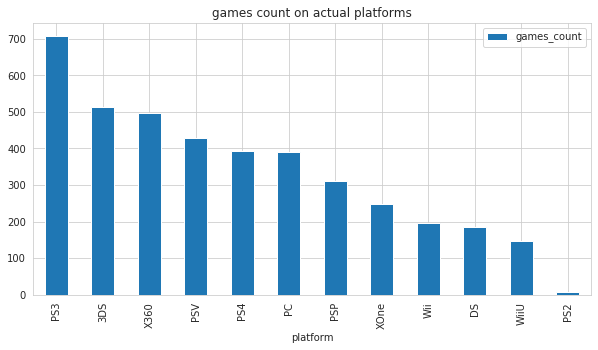

In [39]:
games_count_actual.plot(kind= 'bar', x='platform', y = 'games_count', title = 'games count on actual platforms'
                 ,figsize = (10,5));

мы видим, что лидерами являются PS3, 3DS, XBox 360

Построим график «ящик с усами» по глобальным продажам игр в разбивке по выбранным платформам. 

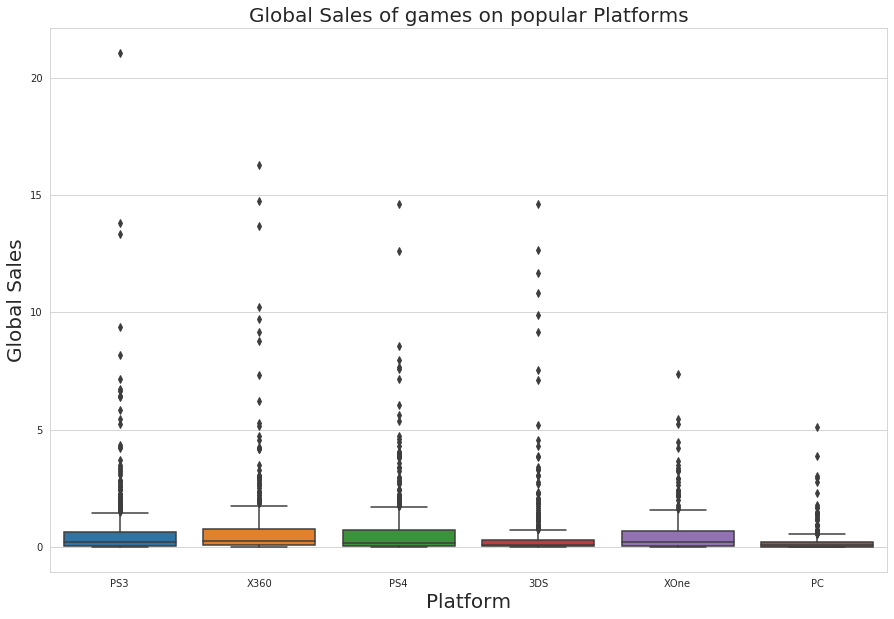

In [40]:
df_platform_box=df[df['platform'].isin(['PS4','XOne','PS3','X360','3DS','PC'])]
plt.figure(figsize=(15,10))
sns.boxplot(x='platform',y='global_sales',data=df_platform_box)
plt.title('Global Sales of games on popular Platforms',fontdict={'fontsize':20})
plt.xlabel('Platform',fontdict={'fontsize':20})
plt.ylabel('Global Sales',fontdict={'fontsize':20});


Глядя на данный график мы можем сказать, что у платформы PS3,судя по всему, есть игра, которая получила огромные продажи по всему миру, имеются такие игры и на других представленных платформах. На всех платформах значения глобальных продаж выходят за пределы "максимума", то есть за пределы значения Q3+1.5IQR, в связи с чем можно сделать вывод, что на всех платформах выпускались игры, которые имели "бешенный" успех, можно сказать мировые бестселлеры, которые, возможно, имели большой успех не один год, а возможно выпускались и на разных платформах, поэтому эти значения выходят за рамки нормального распределения, так как все же все игры не могут иметь такой успех постоянно, либо этот успех будет зависеть в том числе и от платформы. Как мы видим из графика, меньше всего "редких" значений у PС и XBox One.<div class="alert alert-info"> <b> Полученная разница между платформами возможно формируется по причине наличия разницы в количестве выпущенных игр для каждой из них и разницы в количестве полученных доходов, а это, в свою  очередь, может указывать на их распространенность и популярность на рынке, так как вряд ли будут выпускать много игр для непопулярной платформы, поэтому, например, в случае выпуска какого-либо "бестселлера" для особо популярной платформы, объем продаж данной игры будет выглядеть как "отклонение".</b>

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

сперва графически отобразим среднюю популярность рассматриваемых платформ, как у критиков, так и пользовательскую

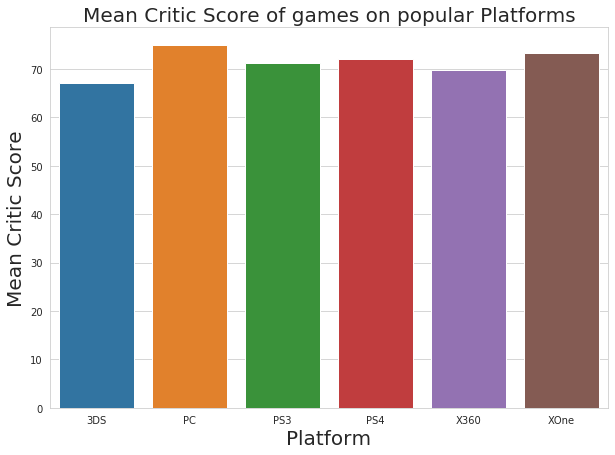

In [41]:
df_critic=df[df['platform'].isin(['PS4','XOne','PS3','X360','3DS','PC'])]
dc = df_critic.pivot_table(index = 'platform', values = 'critic_score', aggfunc = 'mean').reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='platform',y='critic_score',data=dc)
plt.title('Mean Critic Score of games on popular Platforms',fontdict={'fontsize':20})
plt.xlabel('Platform',fontdict={'fontsize':20})
plt.ylabel('Mean Critic Score',fontdict={'fontsize':20});

<div class="alert alert-info"> <b>мы видим, что средний рейтинг критиков по платформам практически не отличается, ниже других только 3DS, а лидер - ПК</b>

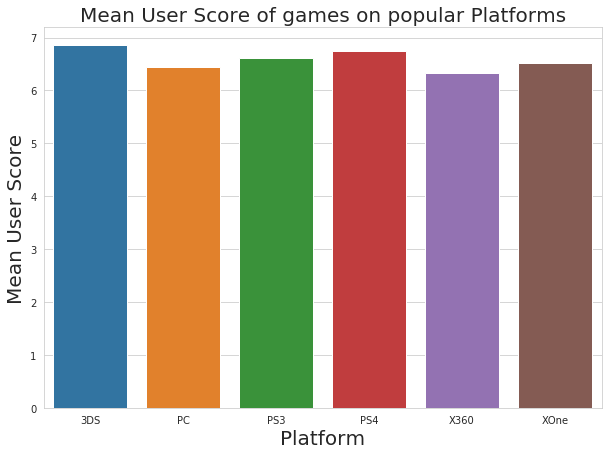

In [42]:
df_user=df[df['platform'].isin(['PS4','XOne','PS3','X360','3DS','PC'])]
du = df_user.pivot_table(index = 'platform', values = 'user_score', aggfunc = 'mean').reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='platform',y='user_score',data=du)
plt.title('Mean User Score of games on popular Platforms',fontdict={'fontsize':20})
plt.xlabel('Platform',fontdict={'fontsize':20})
plt.ylabel('Mean User Score',fontdict={'fontsize':20});

 <div class="alert alert-info"> <b>в части пользовательского рейтинга существенных отличий между платформами мы также не наблюдаем, однако видим, что аутсайдер у "знатоков дела" является лидером у "обывателей", а ПК вместе с XBox 360 наоборот ниже других</b>

для примера возьмем популярную и потенциально перспектвную платформу Xbox One

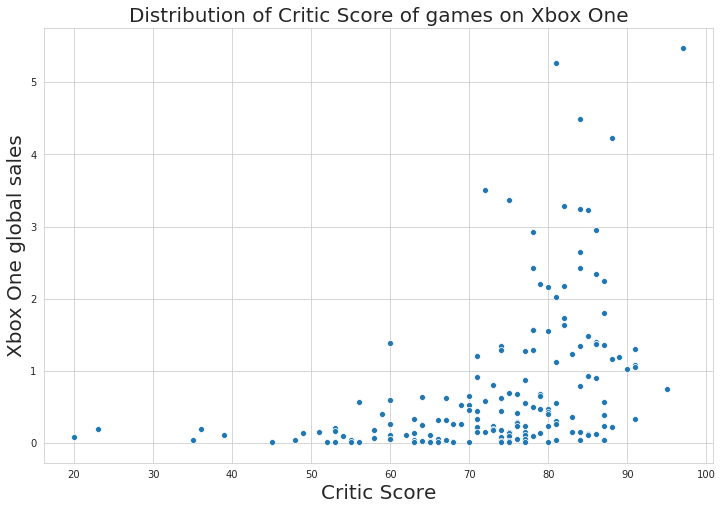

In [43]:
df_user_1=df[df['platform'].isin(['XOne'])]
plt.figure(figsize=(12,8))
sns.scatterplot(x='critic_score',y='global_sales',data=df_user_1)
plt.title('Distribution of Critic Score of games on Xbox One',fontdict={'fontsize':20})
plt.xlabel('Critic Score',fontdict={'fontsize':20})
plt.ylabel('Xbox One global sales',fontdict={'fontsize':20});

мы наблюдаем прямо пропорциональную завивисимость объема продаж от значения оценки критиков, то есть с увеличением оценки как правило увеличивается и объем продаж, при этом существенное увеличение начинается от оценки 70. Вместе с тем, полученный разброс значений не позволяет однозначно утверждать, что увеличение оценки критика точно приведет к существенному росту объема продаж, но, во всяком случае, к снижению не приводит, как мы видим

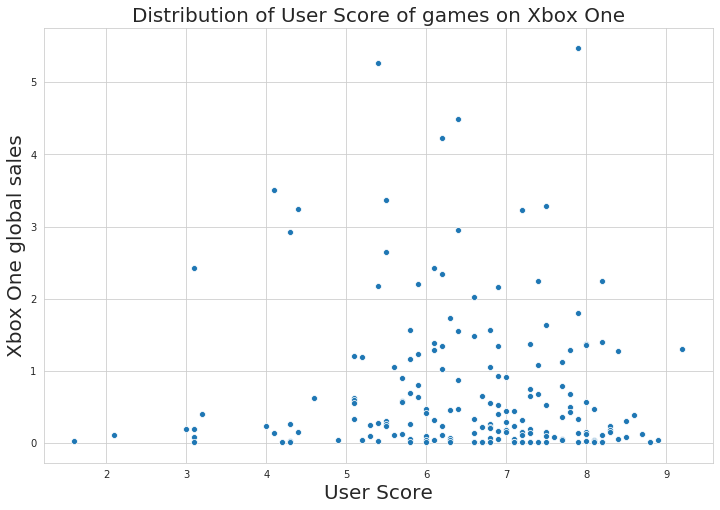

In [44]:
df_user_1=df[df['platform'].isin(['XOne'])]
plt.figure(figsize=(12,8))
sns.scatterplot(x='user_score',y='global_sales',data=df_user_1)
plt.title('Distribution of User Score of games on Xbox One',fontdict={'fontsize':20})
plt.xlabel('User Score',fontdict={'fontsize':20})
plt.ylabel('Xbox One global sales',fontdict={'fontsize':20});

вцелом, как сперва кажется, аналогичную картину мы наблюдаем и в случае с отзывами пользователей, при этом тут существенное увеличение объема продаж начинается уже с пересечения половины шкалы рейтинга. Вместе с тем, как и в случае с оценками критиков, в данном случае нельзя однозначно утверждать, что увеличение значения оценки пользователей точно приводит к росту объема продаж, как мы видим, в некоторых случаях большой объем продаж достигается и при низких оценках, то есть сильной прямой зависимости объема продаж от оценки пользователей мы не наблюдаем, в случае с оценкой критиков она более сильная.Таким образом, хотя оценка критиков возможно и более консервативна, чем оценка пользователей, но она намного лучше коррелирует с продажами. Фактически, оценка пользователя практически вообще не коррелирует (занчение коэффициента Пирсона стремится нулю) с продажами игр, что мы можем увидеть ниже.

для проверки наших выводов посмотрим значения коэффициентов корреляции по рассматриваемым параметрам

In [45]:
df_score = ['global_sales', 'critic_score', 'user_score']
df_score_corr = df[df_score].corr()

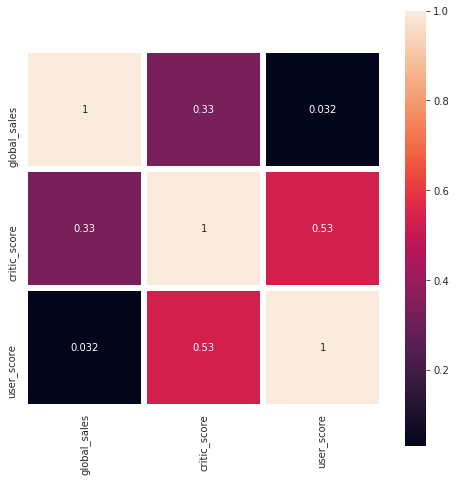

In [46]:
f, ax = plt.subplots(figsize=(8, 8))
plt.xticks(rotation='90')
sns.heatmap(df_score_corr, square=True, linewidths=5, annot=True);

мы видим, что зависимость между объемом продаж и оценкой критиков (коэффициент корреляции Пирсона = 0,33) гораздо сильнее, чем между объемом продаж и оценкой пользователей (коэффициент корреляции Пирсона = 0,032), в чем мы убедились выше. Мы также наблюдаем достаточно сильную зависимость между оценкой критиков и оценкой пользователей, значение коэффициента корреляции составляет 0,53.

сравним полученные результаты с продажами по другим анализируемым платформам, в частности проследив наличие аналогичной зависимости

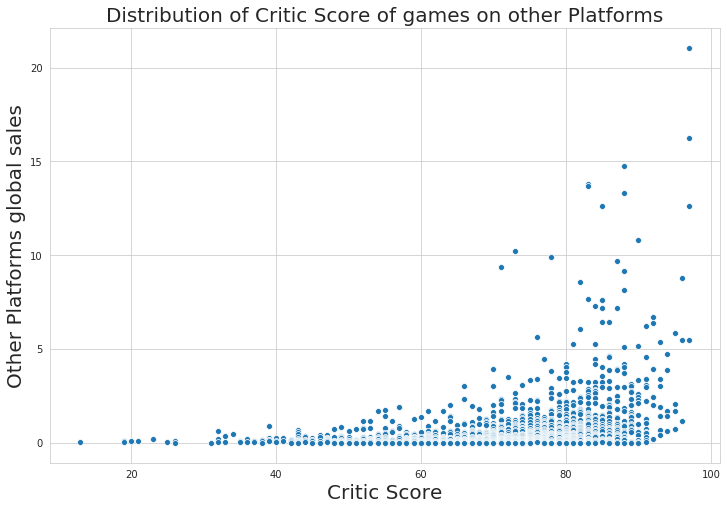

In [47]:
df_cr_1=df[df['platform'].isin(['PS4','XOne','PS3','X360','3DS','PC'])]
plt.figure(figsize=(12,8))
sns.scatterplot(x='critic_score',y='global_sales',data=df_cr_1)
plt.title('Distribution of Critic Score of games on other Platforms',fontdict={'fontsize':20})
plt.xlabel('Critic Score',fontdict={'fontsize':20})
plt.ylabel('Other Platforms global sales',fontdict={'fontsize':20});

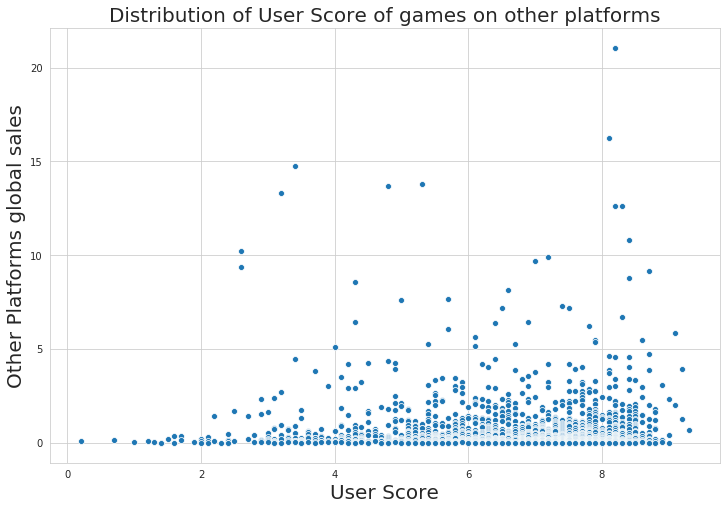

In [48]:
df_us_1=df[df['platform'].isin(['PS4','XOne','PS3','X360','3DS','PC'])]
plt.figure(figsize=(12,8))
sns.scatterplot(x='user_score',y='global_sales',data=df_us_1)
plt.title('Distribution of User Score of games on other platforms',fontdict={'fontsize':20})
plt.xlabel('User Score',fontdict={'fontsize':20})
plt.ylabel('Other Platforms global sales',fontdict={'fontsize':20});

вцелом мы наблюдаем аналогичную картину, то есть с увеличением оценки объем продаж увеличивается, но опять же, стремление значения оценки к максимальному не приводит к значительному увеличению объема продаж, хотя и к уменьшению не приводит

 <div class="alert alert-info"> <b>Скорее всего оценки сильнее всего влияют на продажи в начале жизненного цикла консолей и влияют меньше к его концу. То есть после определенного момента формируется база "фанатов", которые готовы покупать игры для этой платформы, не считаясь с мнениями других, в том числе и не покупать по той же причине, если платформа "не зашла". Кроме того, мы обнаружили достаточно большое количество пропусков по данным рейтингам, то есть на многие игры рецензий просто нет, соответственно и влияния на продажи по данным игр быть не может.</b>

сравним средние пользовательский рейтинг и рейтинг критиков

In [49]:
df['user_score']=df['user_score']*10
df_critic_2=df[df['platform'].isin(['PS4','XOne','PS3','X360','3DS','PC'])]
df_cs=df_critic_2[['platform','critic_score']].groupby('platform')['critic_score'].mean().reset_index()
df_us=df_critic_2[['platform','user_score']].groupby('platform')['user_score'].mean().reset_index()

trace1=go.Bar(x=df_cs['platform'],
             y=df_cs['critic_score'],
              marker=dict(color='rgba(34,139,34,0.5)',
                          line=dict(color='rgb(0,0,0)',width=1.5)),
              name='Critic Score')

trace2=go.Bar(x=df_us['platform'],
             y=df_us['user_score'],
              marker=dict(color='rgba(255,99,71,0.5)',
                          line=dict(color='rgb(0,0,0)',width=1.5)),
              name='User Score')

layout=go.Layout(title='Average User and Critic Score for games in different Platforms',
                xaxis=dict(title='Platform'),
                yaxis=dict(title='Average Scores'),
                barmode='relative')

fig=go.Figure(data=[trace1,trace2],layout=layout)

iplot(fig)

На платформах PС, PS3,PS4, XBox 360 и XBox One рейтинг критиков, хотя не намного, но выше, чем рейтинг пользователей. С другой стороны, на платформе 3DS пользовательский рейтинг выше, чем у критиков.

Посмотрим на долю игр каждого жанра в рассматриваемом датасете

In [50]:
df_genre=df['genre'].value_counts()

trace=go.Pie(labels=df_genre.index,
            values=df_genre.values,
            hole=0.3)

layout=go.Layout(title='Fraction of games of each Genre')

fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

Мы видим, что в долевом выражении лидируют такие жанры, как: Action, Sports, Misc, Role-Playing, Adventure. Таким образом, больше всего создается игр в жанре экшн, а меньше всего стратегий и пазлов. з.ы. интересно было бы взглянуть на характеристики пользователей, "интеллектуальным" данный спрос не назовешь.

Посмотрим распеределение жанров по объемам продаж, отобразив результат в графическом виде

In [51]:
df_genres = df.pivot_table(index= 'genre', values = 'global_sales', aggfunc = 'sum').reset_index()
df_genres.columns = ['genre', 'sum_global_sales']
df_genres = df_genres.sort_values(by = 'sum_global_sales',ascending=False)
df_genres

,genre,sum_global_sales
0,Action,557.80
8,Shooter,402.91
7,Role-Playing,245.63
10,Sports,237.15
3,Misc,139.42
4,Platform,88.68
6,Racing,88.31
2,Fighting,66.90
9,Simulation,50.26
1,Adventure,45.04


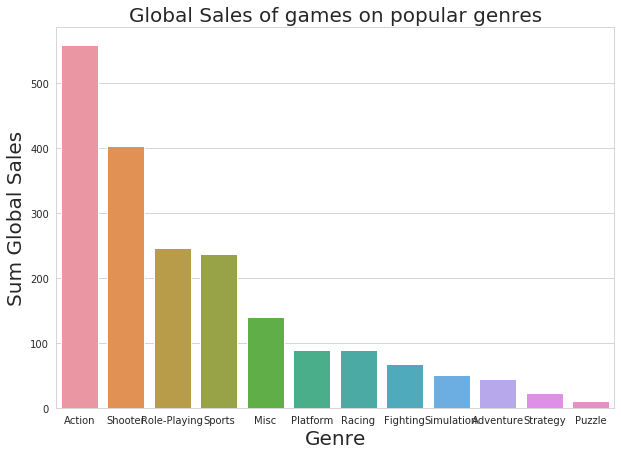

In [52]:
plt.figure(figsize=(10,7))
sns.barplot(x='genre',y='sum_global_sales',data=df_genres)
plt.title('Global Sales of games on popular genres',fontdict={'fontsize':20})
plt.xlabel('Genre',fontdict={'fontsize':20})
plt.ylabel('Sum Global Sales',fontdict={'fontsize':20});

Мы видим, что по объему продаж лидируют следующие жанры: Action, Sports, Shooter, Misc, Role-Playing. Таким образом, вцелом список лидирующих по выпуску жанров совпадает со списоком лидеров по продажам, разве что жанр приключений выпал из списка, вероятно производители не всегда угадывали спрос на данного рода игры. Аутсайдером в списке по объемам продаж являются стратегии и пазлы, тут ничего нового. Вместе с тем, уровень дохода не дает нам достоверной информации о прибыльности того или иного жанра, так как для этого необходимо иметь полную информацию о расходах.

посмотрим также распределение продаж в разрезе жанров-лидеров во времени

In [53]:
trace_list = []
for column in ['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing']:
    z=df[df['genre']==column][['global_sales', 'year_of_release']].groupby('year_of_release')['global_sales'].sum().sort_index()
    trace=go.Scatter(x=z.index,y=z.values,mode='lines+markers',name=column)
    trace_list.append(trace)
    layout=go.Layout(title='Global sales of top genres released each year',xaxis=dict(title='Year'),yaxis=dict(title='Global sales'))
    fig=go.Figure(data= trace_list,layout=layout)
iplot(fig)

<div class="alert alert-info"> <b>вцелом, спрос на игры рассматриваемых жанров носит более-менее характер в течение анализируемого периода, хотя с 2013 г. мы наблюдаем резкое падение объема продаж по жанру Action, а с 2011 по 2013 падение объема продаж шутеров. Ролевые игры продаются более-менее стаибльно средними объемами, как, собственно, спортивные и игры жанра Misc, хотя и объем продаж последнего жанра стремительно снижается к концу анализируемого периода, при этом по Sports и Misc в 2012 году случился провал в 2012 году.</b>

### Выводы

В ходе выполнения 3 шага мы сделали нижеследующее.

С помощью сводной таблицы посмотрели, сколько игр выпускалось в разные годы, отобразив данную динамику в графическом виде. Мы установили, что наибольшее количество игр выпущено в 2008-2009 гг., после чего количество выпускаемых игр начало резко снижаться, при этом до 1994 года количество выпущенных игр являлось незначительным, если смотреть на общую динамику за рассматриваемый период.

Причина спада продаж после 2009 года не одна. Одна из них - развитие мобильного  и онлайн гейминга, который стал вытеснять игры, разработанные исключительно под консоли и портативные устройства, игры на физических носителях начали уходить в прошлое.Опять же, в 2008 году случился мировой финансовый кризис, который повлиял не только на промышленность, рынок игровой индустрии также прошел испытание на прочность, а причина всякого кризиса заключается в цикличности развития, рынок перенасыщается и обвал неизбежен,в случае экономики потребления это особенно выраженно проявляется.

Далее мы посмотрели, как менялись продажи по платформам, выбрали топ-10 платформ с наибольшими суммарными продажами и построили распределение продаж по годам в разрезе первых 6 платформ.

Кроме того, с помощью фнукции np.ptp нашли разницу между максимальным и мнимальным значениями года релиза по каждой из 6 платформ, тем самым установив срок "жизни" каждой из этих платформ.

Так, средний срок "жизни" платформы составил 10.2 лет.

Мы увидели, что в основном период значительных продаж начианается с 1994 года, в частности с платформы PS, до указанного года мы наблюдали продажи по платформе  DS, однако, как мы определили выше, это выбросы. Как мы обозначили, в период с 2004 по 2006 гг. появилось 4 новых платформы, а именно DS, XBox 360, PS3, Wii. Характерный срок жизни платформы, как мы определили выше, составил 10-11 лет, поэтому с учетом того, что мы прогнозируем ситуацию на 2017 год, принято, что начало анализируемого периода должно быть не позднее 2007 года, но, чтобы при анализе рассматривать только последние поколения платформ, которые будут актуальными в 2017 году, и в то же время был достаточный по продожительности интервал времени для проведения статистических расчетов, то есть использовать закон больших чисел, начало интервала обозначили как 2010 год, то есть актуальным определили период с 2010 по 2016 гг.

Далее мы получили сведения о лидерах продаж в разрезе платформ за актуализированный период и отразили полученный результат в графичеком виде.

в данном случае лидерами по продажам являются следующие платформы: xbox360, PS3, PS4, 3DS, по остальным платформам значение суммарных продаж значительно ниже. Вместе с тем, с учетом полученной выше информации о сроке "жизни" платформы, мы отметили, что к концу анализируемого периода объем продаж по данным лидирующим платформам будет снижаться, за исключением PS4, а перспективными, то есть растущими, в данном случае являются следующие платформы:XOne, PS4, при этом PS4 мало того, что растущая, так еще и довольно высокодоходная платформа. Таким образом, наиболее интересными для анализа определены следующие платформы:xbox360, PS3, PS4, 3DS, XOne. Также включили сюда PC, так как несмотря на невысокий уровень доходов, вряд ли в ближайшем будущем данная платформа канет в лету, к тому же рынок игр для PC стоит особняком, так как эту платформу можно назвать универсальной.

Посмотрели также на количество игр, выпущенных за актуальный период для каждой платформы.

Мы увидели, что лидерами являются PS3, 3DS, XBox 360

Далее мы построили график «ящик с усами» по глобальным продажам игр в разбивке по выбранным платформам. 

Глядя на данный график мы увидели, что у платформы PS3,судя по всему, есть игра, которая получила огромные продажи по всему миру, имеются такие игры и на других представленных платформах. На всех платформах значения глобальных продаж выходят за пределы "максимума", то есть за пределы значения Q3+1.5IQR, в связи с чем  сделан вывод о  том, что на всех платформах выпускались игры, которые имели "бешенный" успех, можно сказать мировые бестселлеры, которые, возможно, имели большой успех не один год, а возможно выпускались и на разных платформах, поэтому эти значения выходят за рамки нормального распределения, так как все же все игры не могут иметь такой успех постоянно, либо этот успех будет зависеть в том числе и от платформы. Как мы увидели из графика, меньше всего "редких" значений у PС и XBox One. Полученная разница между платформами возможно формируется по причине наличия разницы в количестве выпущенных игр для каждой из них и разницы в количестве полученных доходов, а это, в свою  очередь, может указывать на их распространенность и популярность на рынке, так как вряд ли будут выпускать много игр для непопулярной платформы, поэтому, например, в случае выпуска какого-либо "бестселлера" для особо популярной платформы, объем продаж данной игры будет выглядеть как "отклонение".

Далее, мы посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.

Сперва графически отобразили популярность рассматриваемых платформ, как у критиков, так и пользовательскую.

Мы увидели, что средний рейтинг критиков по платформам практически не отличается, ниже других только 3DS, а лидер - ПК.

В части пользовательского рейтинга существенных отличий между платформами мы также не наблюдали, однако обнаружили, что аутсайдер у "знатоков дела" является лидером у "обывателей", а ПК вместе с XBox 360 наоборот ниже других.

Для примера взяли популярную и потенциально перспектвную платформу Xbox One.

Мы наблюдали прямо пропорциональную завивисимость объема продаж от значения оценки критиков, то есть с увеличением оценки как правило увеличивается и объем продаж, при этом существенное увеличение начинается от оценки 70. Вместе с тем, полученный разброс значений не позволяет однозначно утверждать, что увеличение оценки критика точно приведет к существенному росту объема продаж, но, во всяком случае, к снижению не приводит.

Также, вцелом, как сперва нам показалось, аналогичную картину мы наблюдали и в случае с отзывами пользователей, при этом тут существенное увеличение объема продаж начиналось уже с пересечения половины шкалы рейтинга. Вместе с тем, как и в случае с оценками критиков, в данном случае нельзя однозначно утверждать, что увеличение значения оценки пользователей точно приводит к росту объема продаж, как мы увидели, в некоторых случаях большой объем продаж достигается и при низких оценках, то есть сильной прямой зависимости объема продаж от оценки пользователей мы не наблюдали, в случае с оценкой критиков она более сильная.Таким образом, хотя оценка критиков возможно и более консервативна, чем оценка пользователей, но она намного лучше коррелирует с продажами. Фактически, оценка пользователя практически вообще не коррелирует (занчение коэффициента Пирсона стремится нулю) с продажами игр, что мы увидели дальше.

Так, для проверки наших выводов, мы посмотрели значения коэффициентов корреляции по рассматриваемым параметрам.

Нами обнаружено, что зависимость между объемом продаж и оценкой критиков (коэффициент корреляции Пирсона = 0,33) гораздо сильнее, чем между объемом продаж и оценкой пользователей (коэффициент корреляции Пирсона = 0,032), в чем мы убедились выше. Мы также наблюдали достаточно сильную зависимость между оценкой критиков и оценкой пользователей, значение коэффициента корреляции составило 0,53.

Далее, мы сравнили полученные результаты с продажами по другим анализируемым платформам, в чатности проследив наличие аналогичной зависимости.Вцелом мы наблюдали аналогичную картину, то есть с увеличением оценки объем продаж увеличивается, но опять же, стремление значения оценки к максимальному не приводит к значительному увеличению объема продаж, хотя и к уменьшению не приводит.

Скорее всего оценки сильнее всего влияют на продажи в начале жизненного цикла консолей и влияют меньше к его концу. То есть после определенного момента формируется база "фанатов", которые готовы покупать игры для этой платформы, не считаясь с мнениями других, в том числе и не покупать по той же причине, если платформа "не зашла". Кроме того, мы обнаружили достаточно большое количество пропусков по данным рейтингам, то есть на многие игры рецензий просто нет, соответственно и влияния на продажи по данным игр быть не может.


Далее мы сравнили пользовательский рейтинг и рейтинг критиков.

На платформах PС, PS3,PS4, XBox 360 и XBox One рейтинг критиков, хотя не намного, но выше, чем рейтинг пользователей. С другой стороны, на платформе 3DS пользовательский рейтинг выше, чем у критиков.

Далее мы посмотрели на долю игр каждого жанра в рассматриваемом датасете.

Мы обнаружили, что в долевом выражении лидируют такие жанры, как: Action, Sports, Misc, Role-Playing, Adventure. Таким образом, больше всего создается игр в жанре экшн, а меньше всего стратегий и пазлов. з.ы. интересно было бы взглянуть на характеристики пользователей, "интеллектуальным" данный спрос не назовешь.

После этого посмотрели распеределение жанров по объемам продаж, также отобразив результат в графическом виде.

Мы увидели, что по объему продаж лидируют следующие жанры: Action, Sports, Shooter, Misc, Role-Playing. Таким образом, вцелом список лидирующих по выпуску жанров совпадает со списоком лидеров по продажам, разве что жанр приключений выпал из списка, вероятно производители не всегда угадывали спрос на данного рода игры. Аутсайдером в списке по объемам продаж являются стратегии и пазлы, тут ничего нового. Вместе с тем, уровень дохода не дает нам достоверной информации о прибыльности того или иного жанра, так как для этого необходимо иметь полную информацию о расходах.

Кроме того, посмотрели также распределение продаж в разрезе жанров-лидеров во времени.

Так, вцелом, спрос на игры рассматриваемых жанров носит более-менее характер в течение анализируемого периода, хотя с 2013 г. мы наблюдали резкое падение объема продаж по жанру Action, а с 2011 по 2013 падение объема продаж шутеров. Ролевые игры продаются более-менее стаибльно средними объемами, как, собственно, спортивные и игры жанра Misc, хотя и объем продаж последнего жанра стремительно снижается к концу анализируемого периода, при этом по Sports и Misc в 2012 году случился провал в 2012 году.


<a id="user"></a>

## Шаг 4. Составление портрета пользователя каждого региона

посмотрим распределение продаж по топ-5 платформам в разрезе каждого региона

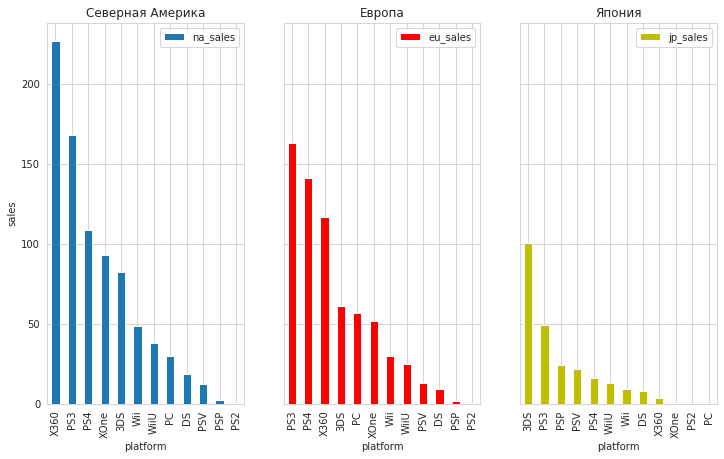

In [54]:
df_na = df.groupby('platform')['na_sales'].sum().to_frame().sort_values(by = 'na_sales', ascending = False)
df_eu = df.groupby('platform')['eu_sales'].sum().to_frame().sort_values(by = 'eu_sales', ascending = False)
df_jp = df.groupby('platform')['jp_sales'].sum().to_frame().sort_values(by = 'jp_sales', ascending = False)

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 7), sharey=True)
df_na.plot.bar(ax=ax[0])
df_eu.plot.bar(ax=ax[1], color='r')
df_jp.plot.bar(ax=ax[2], color='y')
ax[0].set(title='Северная Америка', xlabel='platform', ylabel = 'sales')
ax[1].set(title='Европа', xlabel='platform', ylabel = 'sales')
ax[2].set(title='Япония', xlabel='platform', ylabel = 'sales');

Мы видим, что в разных регионах разные и лидеры по объемам продаж, в частности в Северной Америке лидером в рассматриваемом периоде является XBox 360, в Европе - PS3, в Японии - 3DS. Различными являются и аутсайдеры в пятерке лучших, в частности в Северной Америке - это лидер японского рынка, а именно 3DS, в Европе - PC, в Японии - один из лидеров европейского рынка, перспективная и высокодоходная платформа, а именно PS4. Кроме того, следует отметить, что и состав лидеров в регионах отличается, в частности в 5-ку лучших PС входит только в Европе, Xone - только в Северной Америке, а Япония и вовсе выделяется, тут в списке лидеров  PSP,PSV, которых нет ни в Европе, ни на Родине медведя Гризли, что ж, другая планета.

аналогичным образом посмотрим распределение объемов продаж по жанрам в разрезе регионов

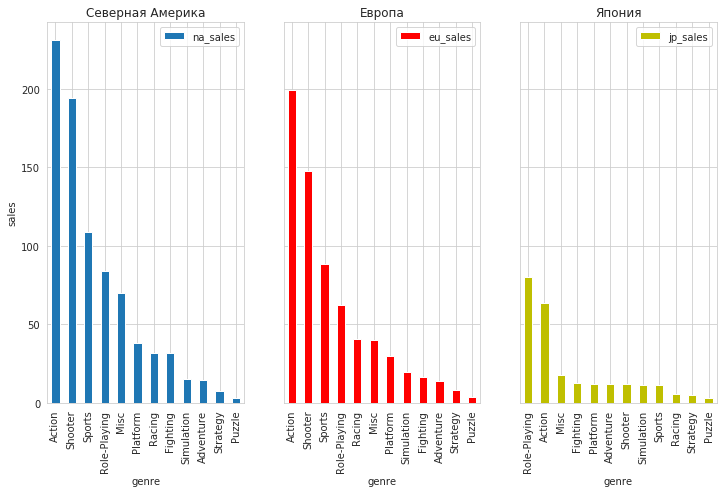

In [55]:
df_na = df.groupby('genre')['na_sales'].sum().to_frame().sort_values(by = 'na_sales', ascending = False)
df_eu = df.groupby('genre')['eu_sales'].sum().to_frame().sort_values(by = 'eu_sales', ascending = False)
df_jp = df.groupby('genre')['jp_sales'].sum().to_frame().sort_values(by = 'jp_sales', ascending = False)

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 7), sharey=True)
df_na.plot.bar(ax=ax[0])
df_eu.plot.bar(ax=ax[1], color='r')
df_jp.plot.bar(ax=ax[2], color='y')
ax[0].set(title='Северная Америка', xlabel='genre', ylabel = 'sales')
ax[1].set(title='Европа', xlabel='genre', ylabel = 'sales')
ax[2].set(title='Япония', xlabel='genre', ylabel = 'sales');

В данном случае жители страны восходящего солнца опять выделелись. Если в Европе и в Северной Америке в лидерах жанр экшн, то абсолютным лидером по продажам в Японии является жанр ролевых игр, хотя надо отдать должное, экшн в Японии также не забывают, он на 2 месте, но любителями "стрелялок" (шутеров) их не назовешь, в отличие от европейцев и североамериканцев, где этот жанр на 2 месте по объемам продаж, в Японии он вообще отсутствует в списке лидеров. Аналогичным образом отличается любовь японцев и остального мира к спортинвым играм, если в Европе и Северной Америке этот жанр на 3 месте в списке лидеров, то в Японии на 9. Список и расположение лидеров в Северной Америке и Европе практически не отличается, за исключением 5 места, на котором в Америке расположился жанр Misc, а в Европе - жанр Racing, при этом Японии в списке лидеров жанр Платформер, а на просьбу назвать имена супергероев, большинство японцев, вероятно, назовут Super Mario.

<div class="alert alert-info"> <b>касательно причин, по которым японский рынок так сильно отличается от других, можно отметить тот факт, что японцы, как мы видим, являются "патриотами" и предпочитают пользоваться платформами собственного производства (разработки), никаких xbox и ПК в лидерах и близко нет. Соответственно, многие игры, с учетом "любви" японцев к своим устройствам, делают исключительно под данные платформы, а с учетом культурных особенностей и вкусовых предпочтений жителей данного региона, например любовь к анимэ, данные игры, разработанные в жанре, на который есть спрос в данной указанной стране, могут так и не стать кроссплатформенными.Поэтому многие японские видеогигры могут развиваться достаточно изолированно, по собственным правилам. Если бы в рассматриваемом датасете имелась информация о стране-разрабочтике игры, то можно было бы отчетливо видеть, что японский рынок, вероятнее всего, в большей части варится в "собственном соку". Один только тот факт, что лидирующей по продажам платформой в рассматриваемом периоде являлась Nintendo 3DS, многие игры для которой весьма специфичны и вряд ли могут рассчитывать на большой успех за пределами Японии, о многом говорит,</b>


посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе, возьмем только самые распространенные рейтинги

In [56]:
df['rating'].value_counts (normalize=True, dropna=False)

NaN     0.424664
M       0.154649
E       0.153655
T       0.153158
E10+    0.113376
EC      0.000249
RP      0.000249
Name: rating, dtype: float64

In [57]:
df['rating'].fillna("no rating", inplace=True)
df_rating=df[df['rating'].isin(['E','M','T','E10+', 'no rating'])]
df_na=df_rating[['rating','na_sales']].groupby('rating')['na_sales'].sum().reset_index()
df_eu=df_rating[['rating','eu_sales']].groupby('rating')['eu_sales'].sum().reset_index()
df_jp=df_rating[['rating','jp_sales']].groupby('rating')['jp_sales'].sum().reset_index()
df_global=df_rating[['rating','global_sales']].groupby('rating')['global_sales'].sum().reset_index()

trace1=go.Bar(x=df_na['rating'],
             y=df_na['na_sales'],
             marker=dict(color='rgba(128,0,0,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='NA Sales')

trace2=go.Bar(x=df_eu['rating'],
             y=df_eu['eu_sales'],
             marker=dict(color='rgba(255,215,0,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='EU Sales')

trace3=go.Bar(x=df_jp['rating'],
             y=df_jp['jp_sales'],
             marker=dict(color='rgba(85,107,47,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='JP Sales')

trace4=go.Bar(x=df_global['rating'],
             y=df_global['global_sales'],
             marker=dict(color='rgba(0,0,205,0.5)',
                        line=dict(color='rgb(0,0,0)',width=1.5)),
             name='Global Sales')

layout=go.Layout(title='Sales in various regions in different Ratings',
                xaxis=dict(title='Ratings'),
                yaxis=dict(title='Sales'),
                barmode='group')

fig=go.Figure(data=[trace1,trace2,trace3,trace4],layout=layout)
iplot(fig)

<div class="alert alert-info"> <b>Мы видим, что в мире лидерами продаж являются игры "для аудитории, старше 17 лет" (рейтинг М), далее следуют игры без установленного рейтинга ESRB, то есть рейтинг ассоциации из Северной Америки, в связи с чем мы можем видеть, что это единственная категория из представленных, где продажи на японском рынке доминируют над продажами на других рассматриваемых регионах, так как для японцев, которые варятся в "собственном соку", судя по всему, этот рейтинг ничего не значит, по этой же причине мы видим малые продажи на японском рынке по остальным категориям, то есть ввиду их малого присутствия на данном рынке. В части соотношения американских и европейских продаж игр без указанного рейтинга можно отметить, что существенного различия в соотношении данных продаж не наблюдается, как и по остальным категориям, американский рынок немного превышет европейский по продажам, при этом слеует отметить, что в Европе имеется свой аналогичный рейтинг, именуемый PEGI. Далее следует рейтинг Е, то есть "игры для всех", так сказать, беспроигрышный вариант для  маркетологов индустрии игр,  после чего идут игры для подростков 13-19 лет (рейтинг Т), и завершает список лидеров рейтинг E10+, а именно игры для всех старше 10 лет.
Как мы уже отметили, вцелом соотношение американского и европейского рынка по всем категориям существенных различий не имеется, выделяется лишь японский рынок. В остальных регионах распределение продаж в разрезе рейтингов практически не отличается от данного распределения вцелом по миру, за исключением игр, для которых данный рейтинг отсутствует, причем, как мы видим, подобных игр немало не только на японском рынке, на европейском и американском рынке их больше, чем игр с рейтингами Е10+ и Т на этих же рынках, и если для Европы это нормально с учетом наличия своей аналогичной организации, то для Северной Америки, где указанная ассоциация доминирует, наличие такого количества продаж игр без указанного рейтинга выглядит странно.Можно предположить, что скорее всего речь в данном случае идет об играх, произведенных не на территории Северной Америки.</b>

### Выводы

В ходе выполнения 4 шага мы сделали нижеследующее.

Так, сперва посмотрели распределение продаж по топ-5 платформам в разрезе каждого региона.

Мы обнаружили, что в разных регионах разные и лидеры по объемам продаж, в частности в Северной Америке лидером в рассматриваемом периоде является XBox 360, в Европе - PS3, в Японии - 3DS. Различными являются и аутсайдеры в пятерке лучших, в частности в Северной Америке - это лидер японского рынка, а именно 3DS, в Европе - PC, в Японии - один из лидеров европейского рынка, перспективная и высокодоходная платформа, а именно PS4. Кроме того, следует отметить, что и состав лидеров в регионах отличается, в частности в 5-ку лучших PС входит только в Европе, Xone - только в Северной Америке, а Япония и вовсе выделяется, тут в списке лидеров  PSP,PSV, которых нет ни в Европе, ни на Родине медведя Гризли, что ж, другая планета.

Аналогичным образом посмотрели распределение объемов продаж по жанрам в разрезе регионов.

В данном случае жители страны восходящего солнца опять выделелись. Если в Европе и в Северной Америке в лидерах жанр экшн, то абсолютным лидером по продажам в Японии является жанр ролевых игр, хотя надо отдать должное, экшн в Японии также не забывают, он на 2 месте, но любителями "стрелялок" (шутеров) их не назовешь, в отличие от европейцев и североамериканцев, где этот жанр на 2 месте по объемам продаж, в Японии он вообще отсутствует в списке лидеров. Аналогичным образом отличается любовь японцев и остального мира к спортинвым играм, если в Европе и Северной Америке этот жанр на 3 месте в списке лидеров, то в Японии на 9. Список и расположение лидеров в Северной Америке и Европе практически не отличается, за исключением 5 места, на котором в Америке расположился жанр Misc, а в Европе - жанр Racing, при этом Японии в списке лидеров жанр Платформер, а на просьбу назвать имена супергероев, большинство японцев, вероятно, назовут Super Mario.

Касательно причин, по которым японский рынок так сильно отличается от других, мы отметили тот факт, что японцы, как мы увидели, являются "патриотами" и предпочитают пользоваться платформами собственного производства (разработки), никаких xbox и ПК в лидерах и близко нет. Соответственно, многие игры, с учетом "любви" японцев к своим устройствам, делают исключительно под данные платформы, а с учетом культурных особенностей и вкусовых предпочтений жителей данного региона, например любовь к анимэ, данные игры, разработанные в жанре, на который есть спрос в данной указанной стране, могут так и не стать кроссплатформенными.Поэтому многие японские видеогигры могут развиваться достаточно изолированно, по собственным правилам. Если бы в рассматриваемом датасете имелась информация о стране-разрабочтике игры, то можно было бы отчетливо видеть, что японский рынок, вероятнее всего, в большей части варится в "собственном соку". Один только тот факт, что лидирующей по продажам платформой в рассматриваемом периоде являлась Nintendo 3DS, многие игры для которой весьма специфичны и вряд ли могут рассчитывать на большой успех за пределами Японии, о многом говорит.

Далее, мы посмотрели, влияет ли рейтинг ESRB на продажи в отдельном регионе, при этом для анализа взяли только самые распространенные рейтинги, в том числе игры без данного рейтинга.

Мы видим, что в мире лидерами продаж являются игры "для аудитории, старше 17 лет" (рейтинг М), далее следуют игры без установленного рейтинга ESRB, то есть рейтинг ассоциации из Северной Америки, в связи с чем мы смогли увидеть, что это единственная категория из представленных, где продажи на японском рынке доминируют над продажами на других рассматриваемых регионах, так как для японцев, которые варятся в "собственном соку", судя по всему, этот рейтинг ничего не значит, по этой же причине мы видим малые продажи на японском рынке по остальным категориям, то есть ввиду их малого присутствия на данном рынке. В части соотношения американских и европейских продаж игр без указанного рейтинга можно отметить, что существенного различия в соотношении данных продаж не наблюдается, как и по остальным категориям, американский рынок немного превышет европейский по продажам, при этом слеует отметить, что в Европе имеется свой аналогичный рейтинг, именуемый PEGI. Далее следует рейтинг Е, то есть "игры для всех", так сказать, беспроигрышный вариант для  маркетологов индустрии игр,  после чего идут игры для подростков 13-19 лет (рейтинг Т), и завершает список лидеров рейтинг E10+, а именно игры для всех старше 10 лет.
Как мы уже отметили, вцелом соотношение американского и европейского рынка по всем категориям существенных различий не имеется, выделяется лишь японский рынок. В остальных регионах распределение продаж в разрезе рейтингов практически не отличается от данного распределения вцелом по миру, за исключением игр, для которых данный рейтинг отсутствует, причем, как мы увидели, подобных игр немало не только на японском рынке, на европейском и американском рынке их больше, чем игр с рейтингами Е10+ и Т на этих же рынках, и если для Европы это нормально с учетом наличия своей аналогичной организации, то для Северной Америки, где указанная ассоциация доминирует, наличие такого количества продаж игр без указанного рейтинга выглядит странно.Мы предположили, что скорее всего речь в данном случае идет об играх, произведенных не на территории Северной Америки.

<a id="hypotheses"></a>

## Шаг 5. Проверка гипотез

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Здесь мы выясняем, есть ли разница между совокупностями, поэтому нулевая гипотеза должна быть такая: «нет, разницы нет, то есть исследуемые параметры равны». Исходя из этого ниже следуют нулевая и альтернативная гипотезы, альтернативная, соответсвтенно, прямо противоположная.


H0 - средние пользовательские рейтинги платформ Xbox One и PC не различаются.

H1 - средние пользовательские рейтинги платформ Xbox One и PC  различаются.


In [58]:
user_score_xone = df.query('platform == "XOne"')['user_score']
user_score_pc = df.query('platform == "PC"')['user_score']


In [59]:
user_score_xone

99        NaN
165      79.0
179      54.0
242      64.0
270      62.0
         ... 
16630    82.0
16643    66.0
16645     NaN
16660    67.0
16672     NaN
Name: user_score, Length: 247, dtype: float64

In [60]:
user_score_pc

192      40.0
313      81.0
458      39.0
480      59.0
538      75.0
         ... 
16658     NaN
16678     NaN
16692    76.0
16696    58.0
16702    72.0
Name: user_score, Length: 389, dtype: float64

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Мы выбрали один из параметрических критериев значимости, которые служат для проверки гипотез о параметрах распределений, в частности t-критерий Стьюдента для независимых выборок.

критический уровень статистической значимости примем за 5%.При выборе уровня значимости мы исходили из практических соображений и посчитали такой критический уровень статистической значимости достаточным. 

In [61]:
from scipy import stats as st
alpha = 0.05 

перед проведением проверки гипотезы через Т-критерий Стьюдента сравним дисперсии двух рассматриваемых выборок, и если они отличаются более, чем на 5%, то считаем отличие значимым и параметр equal_var задаем равным False

In [62]:
variance_user_score_xone = np.var(user_score_xone, ddof=1)
variance_user_score_pc = np.var(user_score_pc, ddof=1)

In [63]:
variance_user_score_xone

190.69968429360694

In [64]:
variance_user_score_pc 

259.6295799535884

In [65]:
variance_score_difference = ((variance_user_score_pc-variance_user_score_xone)/variance_user_score_xone)*100

In [66]:
variance_score_difference 

36.14578383562237

мы видим, что разница составляет более 36%

In [67]:
 results = st.ttest_ind(
    user_score_xone, 
    user_score_pc, equal_var = False,nan_policy='omit' )

In [68]:
print('p-значение:', results.pvalue)


p-значение: 0.6130712247637622


In [69]:
if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги платформ Xbox One и PC различаются, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы можем опровергнуть нулевую гипотезу.")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC не различаются, так как значение статистической значимости больше критического уровня статистической  значимости, поэтому мы не можем опровергнуть нулевую гипотезу.")

Средние пользовательские рейтинги платформ Xbox One и PC не различаются, так как значение статистической значимости больше критического уровня статистической  значимости, поэтому мы не можем опровергнуть нулевую гипотезу.


*Полученный результат говорит о том, что хотя средние пользовательские рейтинги указанных платформ могут быть неодинаковыми, с вероятностью более 61% это различие можно получить случайно, то есть это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами по рассматриваемым выборкам.*

Далее проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports  разные.

H0 - средние пользовательские рейтинги жанров Action и Sports не различаются.

H1 - средние пользовательские рейтинги жанров Action и Sports различаются.

Расчеты проведем аналогичные вышепроведенным, так как в данном случае отличие лишь в том, что рейтинги разделены по признаку принадлжености к жанрам, а не к платформам.

In [70]:
user_score_action = df.query('genre == "Action"')['user_score']
user_score_sports = df.query('genre == "Sports"')['user_score']

аналогичным образом сравним дисперсии рассматриваемых выборок

In [71]:
variance_score_action = np.var(user_score_action, ddof=1)
variance_score_sports = np.var(user_score_sports, ddof=1)

In [72]:
variance_score_action

181.18770103036582

In [73]:
variance_score_sports

288.2509540401527

In [74]:
variance_score_difference_1 = ((variance_score_sports-variance_score_action)/variance_score_action)*100

In [75]:
variance_score_difference_1 

59.089691188169446

мы видим, что разница составляет более 59%

In [76]:
 results = st.ttest_ind(
    user_score_action, 
    user_score_sports, equal_var = False, nan_policy='omit')

In [77]:
print('p-значение:', results.pvalue)


p-значение: 8.2856485494313e-19


In [78]:
if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги жанров Action и Sports различаются, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы можем опровергнуть нулевую гипотезу.")
else:
    print("Средние пользовательские рейтинги жанров Action и Sports не различаются, так как значение статистической значимости больше критического уровня статистической  значимости, поэтому мы не можем опровергнуть нулевую гипотезу.")

Средние пользовательские рейтинги жанров Action и Sports различаются, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы можем опровергнуть нулевую гипотезу.


То  есть, вероятность того, что существующая разница между средними пользовательскими рейтингами 2 жанров является случайностью, крайне мала. Эта вероятность позволяет сделать вывод о значимом различии между средними рейтингами по рассматриваемым жанрам.

### Выводы

В ходе выполения 5 шага мы проверили следюущие гипотезы:

*средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

*средние пользовательские рейтинги жанров Action  и Sports  разные.

Чтобы проверить данные гипотезы мы применили метод scipy.stats.ttest_ind().  Мы выбрали один из параметрических критериев значимости, которые служат для проверки гипотез о параметрах распределений, в частности t-критерий Стьюдента для независимых выборок.

Критический уровень статистической значимости при проверке обеих гипотез приняли за 5%.При выборе уровня значимости мы исходили из практических соображений и посчитали такой критический уровень статистической значимости достаточным.

Также, перед проведением проверки гипотезы через Т-критерий Стьюдента, мы сравнили дисперсии двух рассматриваемых выборок, и если они отличались более, чем на 5%, то считали отличие значимым и параметр equal_var задавали равным False.

В ходе проверки первой гипотезы мы выдвинули следующие нулевую и альтернативную гипотезу:

H0 - средние пользовательские рейтинги платформ Xbox One и PC не различаются.

H1 - средние пользовательские рейтинги платформ Xbox One и PC  различаются.

В результате проверки первой гипотезы нами установлено, что средние пользовательские рейтинги платформ Xbox One и PC не различаются, так как значение статистической значимости больше критического уровня статистической  значимости, поэтому мы не смогли опровергнуть нулевую гипотезу.

*Полученный результат говорит о том, что хотя средние пользовательские рейтинги указанных платформ могут быть неодинаковыми, с вероятностью более 61% это различие можно получить случайно, то есть это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами по рассматриваемым выборкам.*

В процессе проверки 2-й гипотезы мы видвинули следущие нулевую и альтернативную гипотезы:

H0 - средние пользовательские рейтинги жанров Action и Sports не различаются.

H1 - средние пользовательские рейтинги жанров Action и Sports различаются.


В результате проверки 2-й гипотезы нами установлено, что средние пользовательские рейтинги жанров Action и Sports различаются, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы смогли опровергнуть нулевую гипотезу.

То есть, вероятность того, что существующая разница между средними пользовательскими рейтингами 2 жанров является случайностью, крайне мала. Эта вероятность позволяет сделать вывод о значимом различии между средними рейтингами по рассматриваемым жанрам.


<a id="conclusion"></a>
## Общие выводы

   **По результатам проведенного исследования можно сделать нижеследующие выводы.**
    
   **В ходе выполнения первого шага мы получили датафрейм со сведениями о продаже игр за период с 1980 по 2016 гг. (данные за 2016 год неполные), где каждая строка таблицы содержит информацию об определенных характеристиках игры, а также непосредственно статистические сведения о продажах данной игры и ее рейтинге.**
    
    
    На данном этапе мы обнаржили следующие проблемы, которые небходимо было решать:наличие пропусков в столбцах с названием игры, года релиза, названия жанра, а также в столбцах со значениями всех рейтингов, логическое несоответствие типов данных определенных столбцов с той информацией, которая в них содержится, а именно в столбце user_score, year_of_release. Кроме того, названия столбцов отражены с заглавной буквы, поэтому их нужно было привести к нижнему регистру.

    Что касается причин, по которым могли появиться вышеуказанные пропуски, то в части года релиза и названия игры, а также жанра нами установлено, что могла иметь место техническая ошибка, так как данных пропусков не так много. Вместе с тем, в части наличия пропусков в столбцах с рейтингами мы предположили, что, возможно, на некоторые игры отсутствовала рецензия критиков, а также отзывы пользователей, также возможно это технический сбой. В части наличия пропусков в столбцу rating предположили, что эти игры не подверглись оценке со стороны ESRB, возможно технический сбой, а возможно данные игры не представилось возможным определить под какую-либо из имеющихся категорий, например различия в законодателстве стран, где выпускаются и реализуются данные игры, либо в силу культурных особенностей в разных странах,то есть где-то это будет игра "для всех", а, например в Иране, такая игра будет недопустима для пользования всем населением, поэтому в отдельных странах могут быть собственные рейтинговые системы для оценки игр, как, например, в Германии имеется система USK. Также наличие пропусков может быть связано в том числе и с тем, что данные за 2016 год неполные.

   **В ходе выполнения 2 шага** В ходе выполнения 2 шага мы привели названия столбцов анализируемого датафрейма к нижнему регистру, преобразовали тип данных столбца с указанием года релиза в формат даты, выделив год. Также, мы преобразовали тип данных столбца user_score в числовой, заменив все нечисловые значения, а именно значения "tbd", на пропуски, так как фактически это и есть отсутствующие значения рейтинга.Пропуски в столбцах name, year_of_release и genre мы удалили ввиду их малого процентного содержания, то есть их удаление значимо не повлияет на конечный результат.Пропуски в столбцах с рейтингом критиков и пользовательским рейтингом оставили без изменения, чтобы не исказить результаты анализа, ввиду их большого количества, а также ввиду того,  что в обоих столбах значения возможно пропущены неслучайно .Пропуски в столбце с категориальными значениями рейтинга ESRB мы решили не трогать, так как их очень большое количество, а самих возможных значений весьма мало, к тому же большая часть строк заполнена 4-мя значениями, поэтому заполнение пропусков может привести к статистически неверному результату анализа.Также мы посчитали суммарные продажи по всем регионам и записали эти данные в новый столбец global_sales.
    
   **В ходе выполнения 3 шага мы сделали нижеследующее.**

     В ходе выполнения 3 шага мы сделали нижеследующее.

    С помощью сводной таблицы посмотрели, сколько игр выпускалось в разные годы, отобразив данную динамику в графическом виде. Мы установили, что наибольшее количество игр выпущено в 2008-2009 гг., после чего количество выпускаемых игр начало резко снижаться, при этом до 1994 года количество выпущенных игр являлось незначительным, если смотреть на общую динамику за рассматриваемый период.

    Причина спада продаж после 2009 года может быть не одна. Одна из них - развитие мобильного  и онлайн гейминга, который стал вытеснять игры, разработанные исключительно под консоли и портативные устройства, игры на физических носителях начали уходить в прошлое.Опять же, в 2008 году случился мировой финансовый кризис, который повлиял не только на промышленность, рынок игровой индустрии также прошел испытание на прочность, а причина всякого кризиса заключается в цикличности развития, рынок перенасыщается и обвал неизбежен,в случае экономики потребления это особенно выраженно проявляется.

    Далее мы посмотрели, как менялись продажи по платформам, выбрали топ-10 платформ с наибольшими суммарными продажами и построили распределение продаж по годам в разрезе первых 6 платформ.

    Кроме того, с помощью фнукции np.ptp нашли разницу между максимальным и мнимальным значениями года релиза по каждой из 6 платформ, тем самым установив срок "жизни" каждой из этих платформ.

    Так, средний срок "жизни" платформы составил 10.2 лет.

    Мы увидели, что в основном период значительных продаж начианается с 1994 года, в частности с платформы PS, до указанного года мы наблюдали продажи по платформе  DS, однако, как мы определили выше, это выбросы. Как мы обозначили, в период с 2004 по 2006 гг. появилось 4 новых платформы, а именно DS, XBox 360, PS3, Wii. Характерный срок жизни платформы, как мы определили выше, составил 10-11 лет, поэтому с учетом того, что мы прогнозируем ситуацию на 2017 год, принято, что начало анализируемого периода должно быть не позднее 2007 года, но, чтобы при анализе рассматривать только последние поколения платформ, которые будут актуальными в 2017 году, и в то же время был достаточный по продожительности интервал времени для проведения статистических расчетов, то есть использовать закон больших чисел, начало интервала обозначили как 2010 год, то есть актуальным определили период с 2010 по 2016 гг.

    Далее мы получили сведения о лидерах продаж в разрезе платформ за актуализированный период и отразили полученный результат в графичеком виде.

    В данном случае мы увидели, что лидерами по продажам являются следующие платформы: xbox360, PS3, PS4, 3DS, по остальным платформам значение суммарных продаж значительно ниже. Вместе с тем, с учетом полученной выше информации о сроке "жизни" платформы, мы отметили, что к концу анализируемого периода объем продаж по данным лидирующим платформам будет снижаться, за исключением PS4, а перспективными, то есть растущими, в данном случае являются следующие платформы:XOne, PS4, при этом PS4 мало того, что растущая, так еще и довольно высокодоходная платформа. Таким образом, наиболее интересными для анализа определены следующие платформы:xbox360, PS3, PS4, 3DS, XOne. Также включили сюда PC, так как несмотря на невысокий уровень доходов, вряд ли в ближайшем будущем данная платформа канет в лету, к тому же рынок игр для PC стоит особняком, так как эту платформу можно назвать универсальной.

    Посмотрели также на количество игр, выпущенных за актуальный период для каждой платформы.

    Мы увидели, что лидерами являются PS3, 3DS, XBox 360.

    Далее мы построили график «ящик с усами» по глобальным продажам игр в разбивке по выбранным платформам. 

    Глядя на данный график мы увидели, что у платформы PS3,судя по всему, есть игра, которая получила огромные продажи по всему миру, имеются такие игры и на других представленных платформах. На всех платформах значения глобальных продаж выходят за пределы "максимума", то есть за пределы значения Q3+1.5IQR, в связи с чем  сделан вывод о  том, что на всех платформах выпускались игры, которые имели "бешенный" успех, можно сказать мировые бестселлеры, которые, возможно, имели большой успех не один год, а возможно выпускались и на разных платформах, поэтому эти значения выходят за рамки нормального распределения, так как все же все игры не могут иметь такой успех постоянно, либо этот успех будет зависеть в том числе и от платформы. Как мы увидели из графика, меньше всего "редких" значений у PС и XBox One. Полученная разница между платформами возможно формируется по причине наличия разницы в количестве выпущенных игр для каждой из них и разницы в количестве полученных доходов, а это, в свою  очередь, может указывать на их распространенность и популярность на рынке, так как вряд ли будут выпускать много игр для непопулярной платформы, поэтому, например, в случае выпуска какого-либо "бестселлера" для особо популярной платформы, объем продаж данной игры будет выглядеть как "отклонение".

    Далее, мы посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.

    Сперва графически отобразили популярность рассматриваемых платформ, как у критиков, так и пользовательскую.

    Мы увидели, что средний рейтинг критиков по платформам практически не отличается, ниже других только 3DS, а лидер - ПК.

    В части пользовательского рейтинга существенных отличий между платформами мы также не наблюдали, однако обнаружили, что аутсайдер у "знатоков дела" является лидером у "обывателей", а ПК вместе с XBox 360 наоборот ниже других.

    Для примера взяли популярную и потенциально перспектвную платформу Xbox One.

    Мы наблюдали прямо пропорциональную завивисимость объема продаж от значения оценки критиков, то есть с увеличением оценки как правило увеличивается и объем продаж, при этом существенное увеличение начинается от оценки 70. Вместе с тем, полученный разброс значений не позволяет однозначно утверждать, что увеличение оценки критика точно приведет к существенному росту объема продаж, но, во всяком случае, к снижению не приводит.

    Также, вцелом, как сперва нам показалось, аналогичную картину мы наблюдали и в случае с отзывами пользователей, при этом тут существенное увеличение объема продаж начиналось уже с пересечения половины шкалы рейтинга. Вместе с тем, как и в случае с оценками критиков, в данном случае нельзя однозначно утверждать, что увеличение значения оценки пользователей точно приводит к росту объема продаж, как мы увидели, в некоторых случаях большой объем продаж достигается и при низких оценках, то есть сильной прямой зависимости объема продаж от оценки пользователей мы не наблюдали, в случае с оценкой критиков она более сильная.Таким образом, хотя оценка критиков возможно и более консервативна, чем оценка пользователей, но она намного лучше коррелирует с продажами. Фактически, оценка пользователя практически вообще не коррелирует (занчение коэффициента Пирсона стремится нулю) с продажами игр, что мы увидели дальше.

    Так, для проверки наших выводов, мы посмотрели значения коэффициентов корреляции по рассматриваемым параметрам.

    Нами обнаружено, что зависимость между объемом продаж и оценкой критиков (коэффициент корреляции Пирсона = 0,33) гораздо сильнее, чем между объемом продаж и оценкой пользователей (коэффициент корреляции Пирсона = 0,032), в чем мы убедились выше. Мы также наблюдали достаточно сильную зависимость между оценкой критиков и оценкой пользователей, значение коэффициента корреляции составило 0,53.

    Далее, мы сравнили полученные результаты с продажами по другим анализируемым платформам, в чатности проследив наличие аналогичной зависимости.Вцелом мы наблюдали аналогичную картину, то есть с увеличением оценки объем продаж увеличивается, но опять же, стремление значения оценки к максимальному не приводит к значительному увеличению объема продаж, хотя и к уменьшению не приводит.

    Скорее всего оценки сильнее всего влияют на продажи в начале жизненного цикла консолей и влияют меньше к его концу. То есть после определенного момента формируется база "фанатов", которые готовы покупать игры для этой платформы, не считаясь с мнениями других, в том числе и не покупать по той же причине, если платформа "не зашла". Кроме того, мы обнаружили достаточно большое количество пропусков по данным рейтингам, то есть на многие игры рецензий просто нет, соответственно и влияния на продажи по данным игр быть не может.


    Далее мы сравнили пользовательский рейтинг и рейтинг критиков.

    На платформах PС, PS3,PS4, XBox 360 и XBox One рейтинг критиков, хотя не намного, но выше, чем рейтинг пользователей. С другой стороны, на платформе 3DS пользовательский рейтинг выше, чем у критиков.

    Далее мы посмотрели на долю игр каждого жанра в рассматриваемом датасете.

    Мы обнаружили, что в долевом выражении лидируют такие жанры, как: Action, Sports, Misc, Role-Playing, Adventure. Таким образом, больше всего создается игр в жанре экшн, а меньше всего стратегий и пазлов. з.ы. интересно было бы взглянуть на характеристики пользователей, "интеллектуальным" данный спрос не назовешь.

    После этого посмотрели распеределение жанров по объемам продаж, также отобразив результат в графическом виде.

    Мы увидели, что по объему продаж лидируют следующие жанры: Action, Sports, Shooter, Misc, Role-Playing. Таким образом, вцелом список лидирующих по выпуску жанров совпадает со списоком лидеров по продажам, разве что жанр приключений выпал из списка, вероятно производители не всегда угадывали спрос на данного рода игры. Аутсайдером в списке по объемам продаж являются стратегии и пазлы, тут ничего нового. Вместе с тем, уровень дохода не дает нам достоверной информации о прибыльности того или иного жанра, так как для этого необходимо иметь полную информацию о расходах.

    Кроме того, посмотрели также распределение продаж в разрезе жанров-лидеров во времени.

    Так, вцелом, спрос на игры рассматриваемых жанров носит более-менее характер в течение анализируемого периода, хотя с 2013 г. мы наблюдали резкое падение объема продаж по жанру Action, а с 2011 по 2013 падение объема продаж шутеров. Ролевые игры продаются более-менее стаибльно средними объемами, как, собственно, спортивные и игры жанра Misc, хотя и объем продаж последнего жанра стремительно снижается к концу анализируемого периода, при этом по Sports и Misc в 2012 году случился провал в 2012 году.


   **В ходе выполнения 4 шага мы сделали нижеследующее.**

   Так, сперва посмотрели распределение продаж по топ-5 платформам в разрезе каждого региона.

    Мы обнаружили, что в разных регионах разные и лидеры по объемам продаж, в частности в Северной Америке лидером в рассматриваемом периоде является XBox 360, в Европе - PS3, в Японии - 3DS. Различными являются и аутсайдеры в пятерке лучших, в частности в Северной Америке - это лидер японского рынка, а именно 3DS, в Европе - PC, в Японии - один из лидеров европейского рынка, перспективная и высокодоходная платформа, а именно PS4. Кроме того, следует отметить, что и состав лидеров в регионах отличается, в частности в 5-ку лучших PС входит только в Европе, Xone - только в Северной Америке, а Япония и вовсе выделяется, тут в списке лидеров  PSP,PSV, которых нет ни в Европе, ни на Родине медведя Гризли, что ж, другая планета.

    Аналогичным образом посмотрели распределение объемов продаж по жанрам в разрезе регионов.

    В данном случае жители страны восходящего солнца опять выделелись. Если в Европе и в Северной Америке в лидерах жанр экшн, то абсолютным лидером по продажам в Японии является жанр ролевых игр, хотя надо отдать должное, экшн в Японии также не забывают, он на 2 месте, но любителями "стрелялок" (шутеров) их не назовешь, в отличие от европейцев и североамериканцев, где этот жанр на 2 месте по объемам продаж, в Японии он вообще отсутствует в списке лидеров. Аналогичным образом отличается любовь японцев и остального мира к спортинвым играм, если в Европе и Северной Америке этот жанр на 3 месте в списке лидеров, то в Японии на 9. Список и расположение лидеров в Северной Америке и Европе практически не отличается, за исключением 5 места, на котором в Америке расположился жанр Misc, а в Европе - жанр Racing, при этом Японии в списке лидеров жанр Платформер, а на просьбу назвать имена супергероев, большинство японцев, вероятно, назовут Super Mario.

    Касательно причин, по которым японский рынок так сильно отличается от других, мы отметили тот факт, что японцы, как мы увидели, являются "патриотами" и предпочитают пользоваться платформами собственного производства (разработки), никаких xbox и ПК в лидерах и близко нет. Соответственно, многие игры, с учетом "любви" японцев к своим устройствам, делают исключительно под данные платформы, а с учетом культурных особенностей и вкусовых предпочтений жителей данного региона, например любовь к анимэ, данные игры, разработанные в жанре, на который есть спрос в данной указанной стране, могут так и не стать кроссплатформенными.Поэтому многие японские видеогигры могут развиваться достаточно изолированно, по собственным правилам. Если бы в рассматриваемом датасете имелась информация о стране-разрабочтике игры, то можно было бы отчетливо видеть, что японский рынок, вероятнее всего, в большей части варится в "собственном соку". Один только тот факт, что лидирующей по продажам платформой в рассматриваемом периоде являлась Nintendo 3DS, многие игры для которой весьма специфичны и вряд ли могут рассчитывать на большой успех за пределами Японии, о многом говорит.

    Далее, мы посмотрели, влияет ли рейтинг ESRB на продажи в отдельном регионе, при этом для анализа взяли только самые распространенные рейтинги, в том числе игры без данного рейтинга.

    Мы увидели, что в мире лидерами продаж являются игры "для аудитории, старше 17 лет" (рейтинг М), далее следуют игры без установленного рейтинга ESRB, то есть рейтинг ассоциации из Северной Америки, в связи с чем мы смогли увидеть, что это единственная категория из представленных, где продажи на японском рынке доминируют над продажами на других рассматриваемых регионах, так как для японцев, которые варятся в "собственном соку", судя по всему, этот рейтинг ничего не значит, по этой же причине мы видим малые продажи на японском рынке по остальным категориям, то есть ввиду их малого присутствия на данном рынке. В части соотношения американских и европейских продаж игр без указанного рейтинга можно отметить, что существенного различия в соотношении данных продаж не наблюдается, как и по остальным категориям, американский рынок немного превышет европейский по продажам, при этом слеует отметить, что в Европе имеется свой аналогичный рейтинг, именуемый PEGI. Далее следует рейтинг Е, то есть "игры для всех", так сказать, беспроигрышный вариант для  маркетологов индустрии игр,  после чего идут игры для подростков 13-19 лет (рейтинг Т), и завершает список лидеров рейтинг E10+, а именно игры для всех старше 10 лет.
    Как мы уже отметили, вцелом соотношение американского и европейского рынка по всем категориям существенных различий не имеется, выделяется лишь японский рынок. В остальных регионах распределение продаж в разрезе рейтингов практически не отличается от данного распределения вцелом по миру, за исключением игр, для которых данный рейтинг отсутствует, причем, как мы увидели, подобных игр немало не только на японском рынке, на европейском и американском рынке их больше, чем игр с рейтингами Е10+ и Т на этих же рынках, и если для Европы это нормально с учетом наличия своей аналогичной организации, то для Северной Америки, где указанная ассоциация доминирует, наличие такого количества продаж игр без указанного рейтинга выглядит странно.Мы предположили, что скорее всего речь в данном случае идет об играх, произведенных не на территории Северной Америки.
   
   **В ходе выполения 5 шага мы проверили следюущие гипотезы:**

 *средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

 *средние пользовательские рейтинги жанров Action  и Sports  разные.

    Чтобы проверить данные гипотезы мы применили метод scipy.stats.ttest_ind().  Мы выбрали один из параметрических критериев значимости, которые служат для проверки гипотез о параметрах распределений, в частности t-критерий Стьюдента для независимых выборок.

    Критический уровень статистической значимости при проверке обеих гипотез приняли за 5%.При выборе уровня значимости мы исходили из практических соображений и посчитали такой критический уровень статистической значимости достаточным.

    Также, перед проведением проверки гипотезы через Т-критерий Стьюдента, мы сравнили дисперсии двух рассматриваемых выборок, и если они отличались более, чем на 5%, то считали отличие значимым и параметр equal_var задавали равным False.

    В ходе проверки первой гипотезы мы выдвинули следующие нулевую и альтернативную гипотезу:

 *Н0 - средние пользовательские рейтинги платформ Xbox One и PC не различаются.

 *H1 - средние пользовательские рейтинги платформ Xbox One и PC  различаются.

    
    В результате проверки первой гипотезы нами установлено, что средние пользовательские рейтинги платформ Xbox One и PC не различаются, так как значение статистической значимости больше критического уровня статистической  значимости, поэтому мы не смогли опровергнуть нулевую гипотезу.

    Полученный результат говорит о том, что хотя средние пользовательские рейтинги указанных платформ могут быть неодинаковыми, с вероятностью более 61% это различие можно получить случайно, то есть это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами по рассматриваемым выборкам.

    В процессе проверки 2-й гипотезы мы видвинули следующие нулевую и альтернативную гипотезы:

 *H0 - средние пользовательские рейтинги жанров Action и Sports не различаются.

 *H1 - средние пользовательские рейтинги жанров Action и Sports различаются.

    В результате проверки 2-й гипотезы нами установлено, что средние пользовательские рейтинги жанров Action и Sports различаются, так как значение статистичекой значимости меньше критического уровня статистической  значимости, поэтому мы смогли опровергнуть нулевую гипотезу.

    То есть, вероятность того, что существующая разница между средними пользовательскими рейтингами 2 жанров является случайностью, крайне мала. Эта вероятность позволяет сделать вывод о значимом различии между средними рейтингами по рассматриваемым жанрам.
    
   **Рекомендации по планированию рекламных кампаний:**
    
   1. Основной упор сделать на рекламу игр на базе платформ: XBox One и PS4.
   
   2. При разработке рекламной стратегии учитывать региональные особенности спроса на игры определенного жанра, особенно следует выделить рынок Японии, где вкусы пользователей значительно отличаются от остального мира. Так, например на рынке Северной Амерки и Европы особое внимание уделить рекламе игр в жанрах: экшн, спорт, шутер. В то время, как на рынке Японии: ролевые игры, экшн, Misc. Кроме того, продажа ролевых игр и шутеров, хотя и приносит средний доход, но более-менее стабильна, поэтому всегда должен быть большой ассортимент игр указанного жанра и рекламную стратегию также необходимо строить исходя из данной особенности. 
   
   3. Особое внимание уделить мнение критиков о той или иной игре, то есть на их оценку, так как величина данной оценки, хотя и не сильно, но влияет на уровень объема продаж, при этом мнение пользователей в данном случае не так важно, как мнение критиков. Вместе с тем, данные рейтинги следует учитывать, когда платформа новая, при уже сформированной "фанатской" базе пользователей платформы, оценка игры не будет иметь большого значения в плане влияния на объемы продаж, скорее оценка больше будет влиять на имидж компании-разработчика.
   
   4. Для указанных платформ XBox One и PS4 не стоит планировать рекламную стратегию более, чем на 5-6 лет, так как к этому времени срок "жизни" данных платформ может истечь, при этом также следует учесть возможность появления новых платформ в ближайшем будущем.
   
   5. При разработке рекламной стратегии следует учесть рейтинг ESRB для конкретных игр. Например лучше всего продаются игры с рейтингом М, то есть игры "для зрелых", хуже всего с рейтингом Е10+, при этом на рынке Японии опять же особенность, здесь игры с рейтингами данной ассоциации имеют малые объемы продаж, в основном продаютя игры без указанного рейтинга, возможно имеется японский аналог данного рейтинга. Поэтому, при разработке рекламной стратегии следует учитывать, что данный рейтинг для определенных игр может не действовать в некоторых странах в силу культурных и законодательных особенностей, в таком случае необходимо фильтровать подобные игры и, при наличии, использовать местный региональный аналог указанного рейтинга.
   
   6. Вцелом, на японский рынок выходить не следует, не изучив в полном объеме специфику спроса на данном рынке. Так, например, японцы в основном пользуются только своими "родными" платформами, и с учетом этого, а также культурных особенностей, список популярных жанров разительно отличается от данного списка в остальном мире.


    